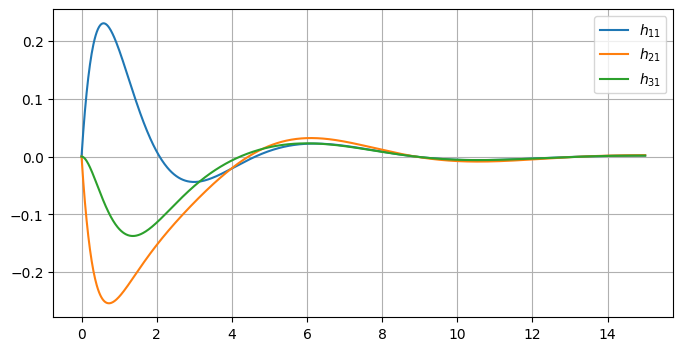

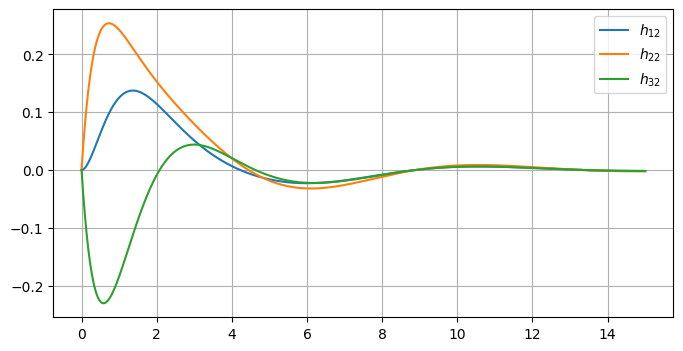

In [1]:
# mass-spring example
# impulse response

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

A = np.array([[0,0,0,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1],
              [-2,1,0,-2,1,0],
              [1,-2,1,1,-2,1],
              [0,1,-2,0,1,-2]], dtype=float)
B = np.array([[0,0],[0,0],[0,0],[1,0],[-1,1],[0,-1]], dtype=float)
C = np.hstack((np.eye(3),np.zeros((3,3))))
D = np.zeros((3,2))
sysG1 = signal.lti(A,B[:,[0]],C,D[:,[0]])
sysG2 = signal.lti(A,B[:,[1]],C,D[:,[1]])

t, yout1 = sysG1.impulse(T=np.linspace(0,15,1000))
t, yout2 = sysG2.impulse(T=np.linspace(0,15,1000))

plt.figure(figsize=(8,4), dpi=100)
plt.plot(t,yout1)
plt.legend([r'$h_{11}$',r'$h_{21}$',r'$h_{31}$'])
plt.grid()
plt.show()

plt.figure(figsize=(8,4), dpi=100)
plt.plot(t,yout2)
plt.legend([r'$h_{12}$',r'$h_{22}$',r'$h_{32}$'])
plt.grid()
plt.show()

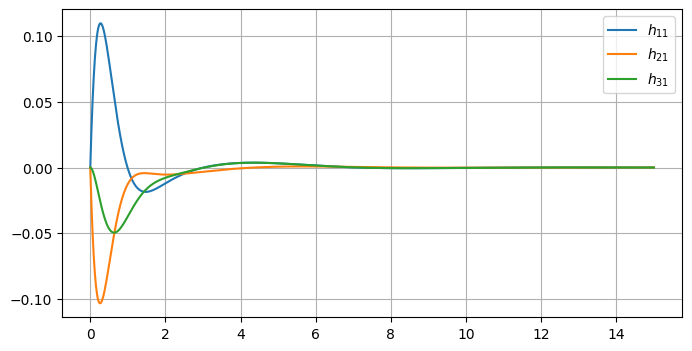

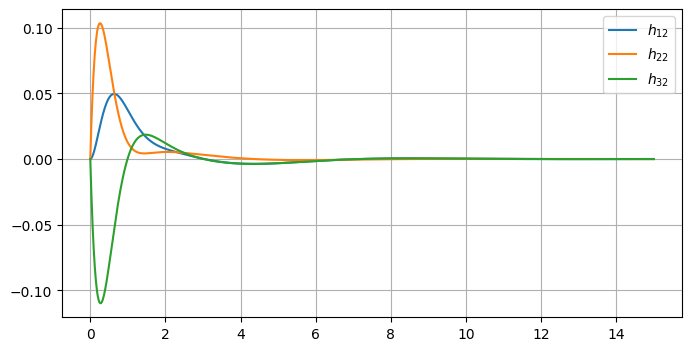

In [2]:
# mass-spring example
# lqr control

import scipy as sp

Q = sp.linalg.block_diag(100*np.eye(3),np.eye(3))
R = np.eye(2)
P = sp.linalg.solve_continuous_are(A,B,Q,R)
K = np.linalg.inv(R)@B.T@P

sysGc1 = signal.lti(A-B@K,B[:,[0]],C,D[:,[0]])
sysGc2 = signal.lti(A-B@K,B[:,[1]],C,D[:,[1]])

t, youtc1 = sysGc1.impulse(T=np.linspace(0,15,1000))
t, youtc2 = sysGc2.impulse(T=np.linspace(0,15,1000))

plt.figure(figsize=(8,4), dpi=100)
plt.plot(t,youtc1)
plt.legend([r'$h_{11}$',r'$h_{21}$',r'$h_{31}$'])
plt.grid()
plt.show()

plt.figure(figsize=(8,4), dpi=100)
plt.plot(t,youtc2)
plt.legend([r'$h_{12}$',r'$h_{22}$',r'$h_{32}$'])
plt.grid()
plt.show()

In [3]:
# force on mass

A = np.array([[0,1],
              [0,0]], dtype=float)
B = np.array([[0],[1]], dtype=float)
C = np.array([1,0], dtype=float)
D = np.array([0])
sysC = signal.lti(A,B,C,D)
print(sysC)

StateSpaceContinuous(
array([[0., 1.],
       [0., 0.]]),
array([[0.],
       [1.]]),
array([[1., 0.]]),
array([[0]]),
dt: None
)


In [4]:
sysC.A

array([[0., 1.],
       [0., 0.]])

In [5]:
# discretized

sysD = sysC.to_discrete(dt=0.1, method='zoh')
print(sysD)

StateSpaceDiscrete(
array([[1. , 0.1],
       [0. , 1. ]]),
array([[0.005],
       [0.1  ]]),
array([[1., 0.]]),
array([[0]]),
dt: 0.1
)


In [6]:
# discretized

sysD = sysC.to_discrete(dt=0.1, method='tustin')
print(sysD)

StateSpaceDiscrete(
array([[1. , 0.1],
       [0. , 1. ]]),
array([[0.005],
       [0.1  ]]),
array([[1.  , 0.05]]),
array([[0.0025]]),
dt: 0.1
)
